# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 7 Exercise </center>

# <center>DBSCAN Clustering</center>


# Part A: Differentiate DBSCAN from KMean using any iris dataset

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Manipulation with pandas

In [2]:
#load dataset here
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [6]:
idf = df.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
idf.head()

petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

# 2. Data Exploration and Visualization

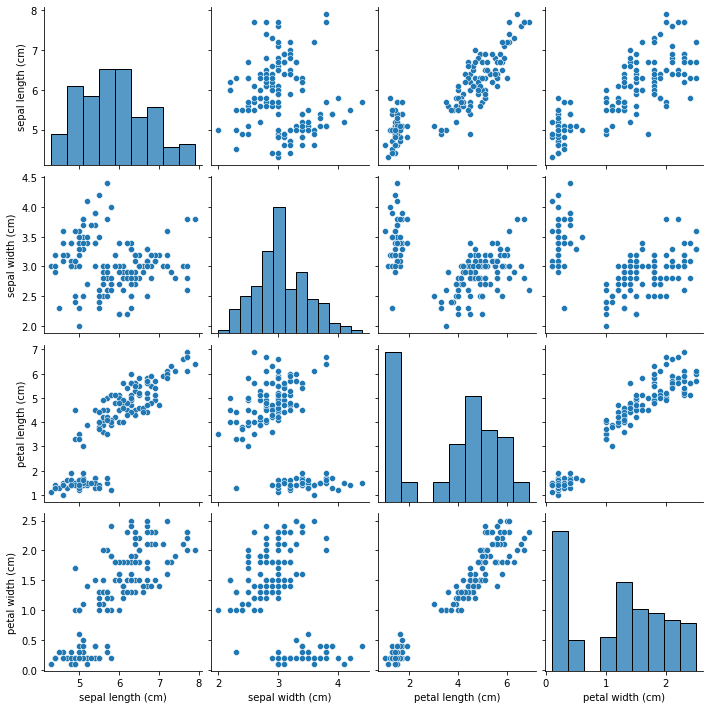

In [21]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

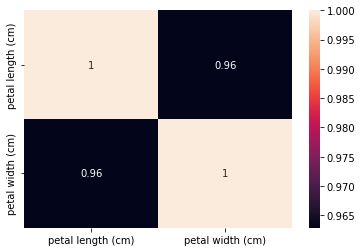

In [7]:
data = idf.corr()
sns.heatmap(data, annot = True)


# 3. Training Model

## 3.1. KMean Clustering

In [9]:
#create kmean model(assuming two clusters) here and explore outputs 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(idf)

KMeans(n_clusters=2, random_state=0)

In [10]:
kmeans.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

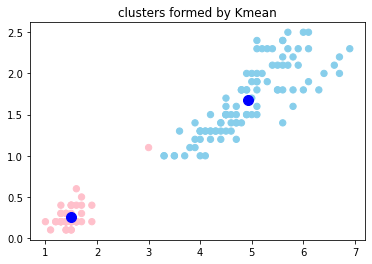

In [19]:
#plot clusters formed by Kmean
colormap = np.array(['pink','skyblue'])
x = df[['petal length (cm)', 'petal width (cm)']]
category = kmeans.predict(x)
plt.scatter(x['petal length (cm)'],x['petal width (cm)'], s= 40, c = colormap[category])
plt.scatter(1.49215686, 0.2627451,s = 100, c='b')
plt.scatter(4.92525253, 1.68181818,s = 100, c='b')
plt.title('clusters formed by Kmean')
plt.show()


## 3.2. DBSCAN Clustering

In [12]:
#create DBSCAN model here and compare output with KMean
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=5)
clustering.fit(idf)

DBSCAN()

In [17]:
y_pred = clustering.fit_predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

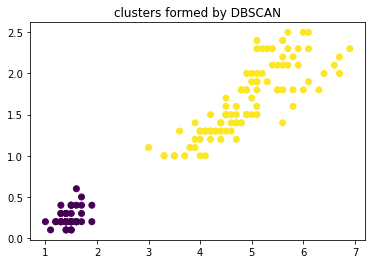

In [20]:
#Plot clusters formed by DBSCAN
colormap = np.array(['pink','skyblue'])
x = df[['petal length (cm)', 'petal width (cm)']]
plt.scatter(x['petal length (cm)'],x['petal width (cm)'],c = y_pred)
plt.title('clusters formed by DBSCAN')
plt.show()


# Part B: Differentiate DBSCAN from KMean on moon shaped dataset

`sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)`

#### - Generate moon-shaped dataset using make_moons() function. Plot clusters to compare clusters formed by Kmean and DBSCAN algorithm.


#### - Change eps value and min_sample value to explore their effect on the learning algorithm.





In [26]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=100, random_state=0, noise=0.04)

In [27]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

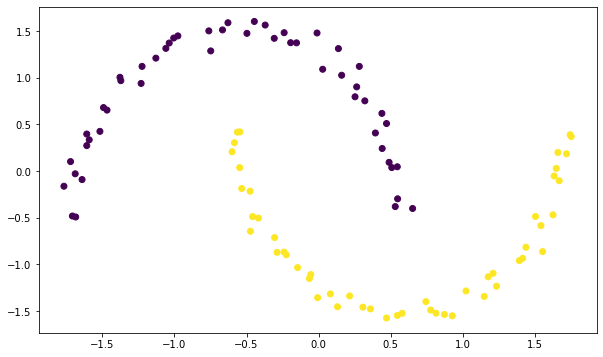

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [29]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1])

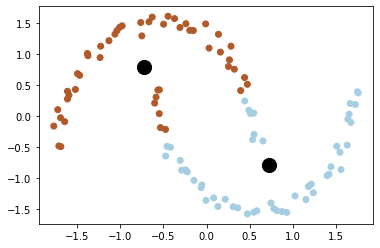

In [30]:
y_pred = kmeans.predict(x)
plt.scatter(x[:,0], x[:,1],c=y_pred, cmap='Paired')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

In [31]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [32]:
db = DBSCAN(eps = 0.5)
db.fit(x)

DBSCAN()

In [33]:
y_pred1 = db.fit_predict(x)
y_pred1

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

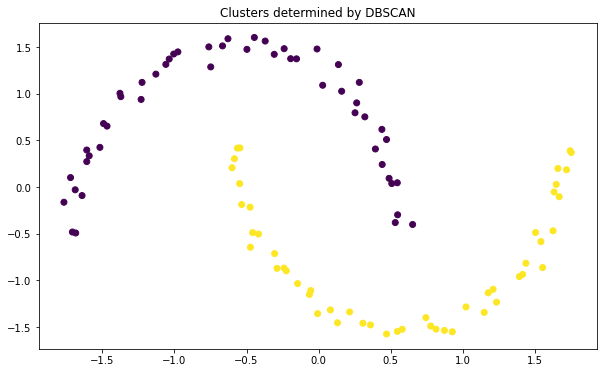

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1],c=y_pred1)
plt.title("Clusters determined by DBSCAN")
plt.show() 

In [35]:
db = DBSCAN(eps = 0.4, min_samples=10)
db.fit(x)
y_pred2 = db.fit_predict(x)
y_pred2

array([ 0, -1, -1, -1,  1, -1,  0,  1, -1, -1, -1, -1,  1, -1, -1,  0,  0,
        0,  0, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1,  0,  0, -1,  1,  1, -1,  1, -1, -1, -1,  0,  0, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  0,  0, -1, -1,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  0,  0, -1, -1, -1,  1,  0, -1,  1,  1,  0,  0,  1, -1, -1,
        1, -1, -1, -1,  1, -1,  0,  0,  1, -1, -1,  1,  1, -1, -1],
      dtype=int64)

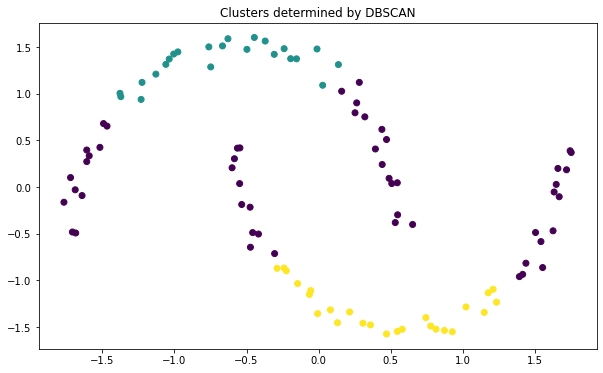

In [36]:
 plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1],c=y_pred2)
plt.title("Clusters determined by DBSCAN")
plt.show()

In [37]:
db = DBSCAN(eps = 0.8, min_samples=3)
db.fit(x)
y_pred3 = db.fit_predict(x)
y_pred3

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

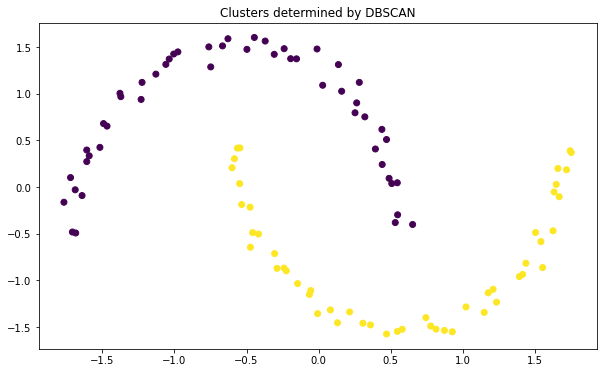

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1],c=y_pred3)
plt.title("Clusters determined by DBSCAN")
plt.show()